In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['figure.facecolor']='#00000000'
matplotlib.rcParams['figure.figsize']=(12,6)

In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


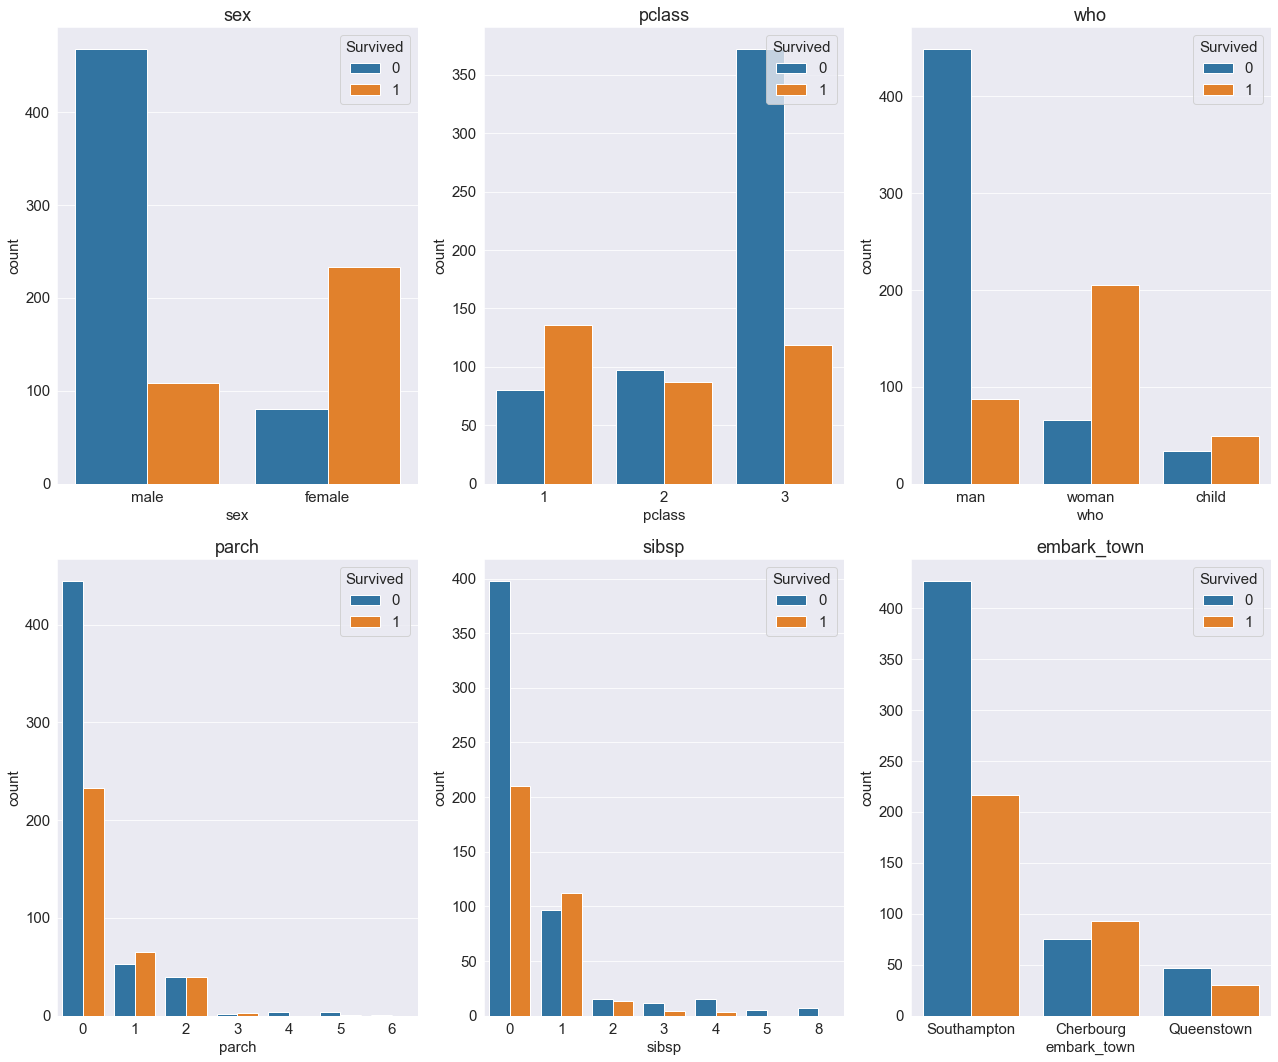

In [4]:
cols=['sex','pclass','who','parch','sibsp','embark_town' ]
nrows=2
ncols=3
fig,axs=plt.subplots(nrows,ncols,figsize=(18,15))
for r in range(0,nrows):
    for c in range(0,ncols):
        i=r*ncols+c
        ax=axs[r][c]
        sns.countplot(x=cols[i],hue='survived',data=titanic,ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
plt.tight_layout()

<AxesSubplot:xlabel='sex'>

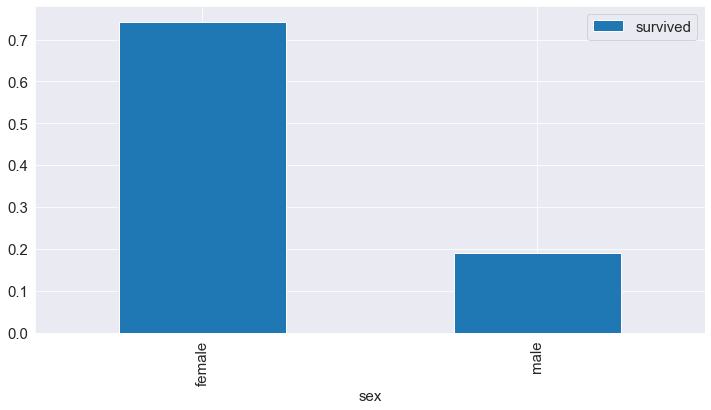

In [5]:
titanic.groupby('sex')[['survived']].mean().plot.bar()

#### pivot_table gives mean of values by default. If we add aggfunc=np.median, it will give median.

In [6]:
titanic.pivot_table(index='sex',columns='pclass',values='survived')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Chances of survival according to passenger class and gender

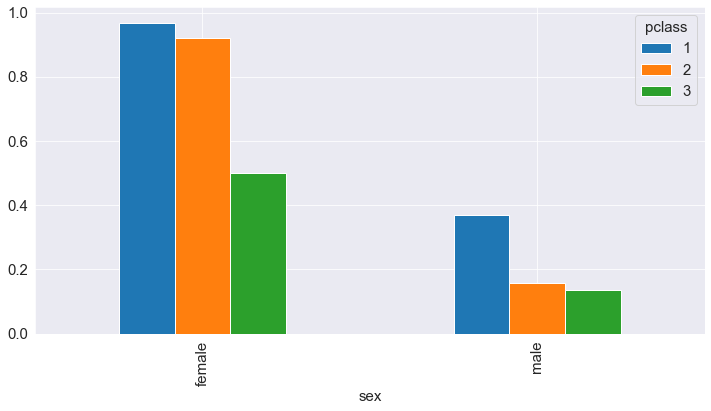

In [7]:
titanic.pivot_table(index='sex',columns='pclass',values='survived').plot.bar();

#### Chances of male survival in class 3 were lowest

#### pd.cut(array,intervals) allows us to form intervals. pd.cut(1,2,3,4) will form intervals [1,2], [2,3], [3,4]

In [8]:
age=pd.cut(titanic.age,[0,18,80])
titanic.pivot_table(index=['sex',age],columns='pclass',values='survived')

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

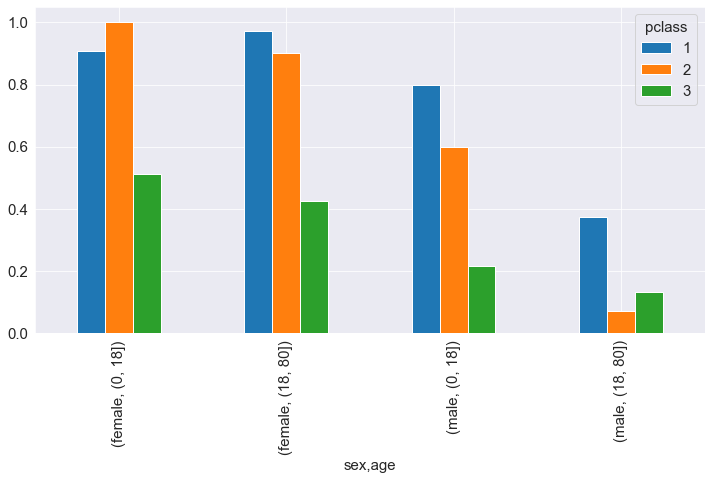

In [9]:
titanic.pivot_table(index=['sex',age],columns='pclass',values='survived').plot.bar();

*Survival of a female under 18 in class 2 was guaranteed*
<br>*Survival chances of an adult male in class 2 were lowest*

#### Price paid for tickets

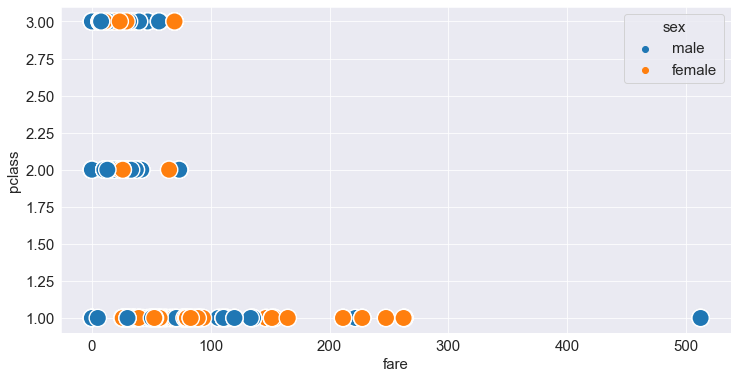

In [10]:
sns.scatterplot(x='fare',y='pclass',hue='sex',s=300,y_bins=np.arange(1,3,1),data=titanic);

*Every class had some passengers riding for free.<br>Passengers who paid more than 100 belonged to the first class.<br>There were more females in first class.*

#### Find value count for each column in dataset

In [11]:
for val in titanic:
    print(titanic[val].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: dec

<font color='green'>*In the dataset, pclass=[1,2,3] corresponds to class=[First,Second,Third]<br> Similarly, embarked corresponds to embarked town. alive corresponds to survived.<br>We have age and sex so we dont need adult male and who.<br> We have sibsp and parch, so we dont need alone.<br> Deck has too many null values.*

In [12]:
titanic=titanic.drop(columns=['class','embark_town','adult_male','who','alive','alone','deck'])

In [13]:
titanic.shape

(891, 8)

#### Drop rows with nulls

In [14]:
titanic=titanic.dropna(subset=['embarked','age'])

In [15]:
titanic.shape

(712, 8)

In [16]:
#Checking datatypes in dataframe:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

### For computing values, we cannot use objects. So we need to convert them to int

# Method 1
### The column sex is dropped and replaced with 2 new columns: Male and Female

In [17]:
#If .copy is not used, then actual dataset also gets affected
pracdf1=titanic.copy()

In [18]:
pracdata1=pd.get_dummies(pracdf1.sex)

In [19]:
pracdata1.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


*Now we have to put this in actual df. For that first drop sex column in original df. Then add new columns for male and female*


In [20]:
pracdf1.drop(columns='sex',inplace=True)

In [21]:
pracdf1.head()

,survived,pclass,age,sibsp,parch,fare,embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [22]:
pracdf1['Male']=pracdata1.male.tolist()
pracdf1['Female']=pracdata1.female.tolist()

In [23]:
pracdf1.head()

,survived,pclass,age,sibsp,parch,fare,embarked,Male,Female
0,0,3,22.0,1,0,7.2500,S,1,0
1,1,1,38.0,1,0,71.2833,C,0,1
2,1,3,26.0,0,0,7.9250,S,0,1
3,1,1,35.0,1,0,53.1000,S,0,1
4,0,3,35.0,0,0,8.0500,S,1,0


# Method 2
### Male and Female will be coverted to 0 and 1 within the sex column
* Here we will generate an array of 0 and 1 corresponding to male and female using label encoder. Next drop old sex column, and add new column with new array

In [24]:
pracdf2=titanic.copy()

In [25]:
print(pracdf2.sex.unique())

['male' 'female']


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(pracdf2.sex)

In [27]:
print(pracdf2.sex.unique())

['male' 'female']


In [28]:
label

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [29]:
le.classes_

array(['female', 'male'], dtype=object)

In [30]:
pracdf2.drop(columns='sex',inplace=True)

In [31]:
pracdf2['sex']=label

In [32]:
print(pracdf2.sex.unique())

[1 0]


In [33]:
pracdf2.head()

,survived,pclass,age,sibsp,parch,fare,embarked,sex
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


# We will use Method 2 to proceed

In [34]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [253]:
print(titanic.sex.unique())
print(titanic.embarked.unique())

[1 0]
[2 0 1]


In [36]:
#We need to change age and embarked
labelsex=le.fit_transform(titanic.sex)
labelemb=le.fit_transform(titanic.embarked)

In [37]:
titanic.drop(columns=['sex','embarked'],inplace=True)

In [38]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [39]:
titanic['embarked']=labelemb
titanic['sex']=labelsex

In [40]:
print(titanic.sex.unique())
print(titanic.embarked.unique())

[1 0]
[2 0 1]


#### <font color='green'> *So male=1, female=0<br> Similarly,S=2,C=0,Q=1*

In [41]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,sex
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


In [42]:
titanic.dtypes

survived      int64
pclass        int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
sex           int32
dtype: object

<font color='green'>*.iloc is for selecting rows using integer indices. eg: df.iloc[0], df.iloc[1:5]<br>.loc is for selecting rows using labels. eg: df.loc[age>10]*

<h1> <font color='orange'> Train Data</h1>

In [55]:
X=titanic.iloc[:,1:8].values

In [56]:
X

array([[ 3.    , 22.    ,  1.    , ...,  7.25  ,  2.    ,  1.    ],
       [ 1.    , 38.    ,  1.    , ..., 71.2833,  0.    ,  0.    ],
       [ 3.    , 26.    ,  0.    , ...,  7.925 ,  2.    ,  0.    ],
       ...,
       [ 1.    , 19.    ,  0.    , ..., 30.    ,  2.    ,  0.    ],
       [ 1.    , 26.    ,  0.    , ..., 30.    ,  0.    ,  1.    ],
       [ 3.    , 32.    ,  0.    , ...,  7.75  ,  1.    ,  1.    ]])

In [59]:
Y=titanic.iloc[:,0].values

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

<font color='green'>*StandardScaler removes the mean and scales each feature/variable to unit variance. It transforms the data in such a manner that it has mean as 0 and standard deviation as 1<br> It makes training of dataset faster*

In [214]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [215]:
#importing models
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0,max_iter=1000)
#max_iter is added to avoid error in cross_val_score. If not included, it asks us to increase max no. of iterations
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.svm import SVC
svc_lin=SVC(kernel='linear',random_state=0)
svc_rbf=SVC(kernel='rbf',random_state=0)
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='entropy',random_state=0)

In [216]:
def getscore(testmodel,X_train,X_test,Y_train,Y_test):
    testmodel.fit(X_train,Y_train)
    return testmodel.score(X_test,Y_test)

In [217]:
print("Training Accuracy using Logistic Regression: ",getscore(log,X_train,X_test,Y_train,Y_test))
print("Training Accuracy using K Nearest Neighbor: ",getscore(knn,X_train,X_test,Y_train,Y_test))
print("Training Accuracy using SVM Linear Classifier: ",getscore(svc_lin,X_train,X_test,Y_train,Y_test))
print("Training Accuracy using SVM RBF Classifier: ",getscore(svc_rbf,X_train,X_test,Y_train,Y_test))
print("Training Accuracy using Gaussian Naive Bayes Classifier: ",getscore(gauss,X_train,X_test,Y_train,Y_test))
print("Training Accuracy using Decision Tree: ",getscore(tree,X_train,X_test,Y_train,Y_test))
print("Training Accuracy using Random Forest: ",getscore(forest,X_train,X_test,Y_train,Y_test))

Training Accuracy using Logistic Regression:  0.7916666666666666
Training Accuracy using K Nearest Neighbor:  0.8055555555555556
Training Accuracy using SVM Linear Classifier:  0.7083333333333334
Training Accuracy using SVM RBF Classifier:  0.7916666666666666
Training Accuracy using Gaussian Naive Bayes Classifier:  0.7083333333333334
Training Accuracy using Decision Tree:  0.6666666666666666
Training Accuracy using Random Forest:  0.7777777777777778


### This can also be shortened and written as:

In [218]:
#create dict
model={'Logistic Regression':log, 'K Nearest Neighbor':knn, 'SVM Linear Classifier': svc_lin,'SVM RBF Classifier' :svc_rbf, 'Gaussian Naive Bayes Classifier' :gauss, 'Decision Tree' :tree, 'Random Forest' :forest}

In [219]:
for k,v in model.items():
    print('Training accuracy using ',k,': ',getscore(v,X_train,X_test,Y_train,Y_test))

Training accuracy using  Logistic Regression :  0.7916666666666666
Training accuracy using  K Nearest Neighbor :  0.8055555555555556
Training accuracy using  SVM Linear Classifier :  0.7083333333333334
Training accuracy using  SVM RBF Classifier :  0.7916666666666666
Training accuracy using  Gaussian Naive Bayes Classifier :  0.7083333333333334
Training accuracy using  Decision Tree :  0.6666666666666666
Training accuracy using  Random Forest :  0.7777777777777778


In [220]:
from sklearn.model_selection import cross_val_score
print('Cross Validation score using Logistic Regression: ',cross_val_score(log,X,Y,cv=10).mean())
print('Cross Validation score using K Nearest Neighbor: ',cross_val_score(knn,X,Y,cv=10).mean())
print('Cross Validation score using SVM Linear Classifier: ',cross_val_score(svc_lin,X,Y,cv=10).mean())
print('Cross Validation score using SVM RBF Classifier: ',cross_val_score(svc_rbf,X,Y,cv=10).mean())
print('Cross Validation score using Gaussian Naive Bayes Classifier: ',cross_val_score(gauss,X,Y,cv=10).mean())
print('Cross Validation score using Decision Tree: ',cross_val_score(tree,X,Y,cv=10).mean())
print('Cross Validation score using Random Forest: ',cross_val_score(forest,X,Y,cv=10).mean())

Cross Validation score using Logistic Regression:  0.7950312989045384
Cross Validation score using K Nearest Neighbor:  0.7037949921752739
Cross Validation score using SVM Linear Classifier:  0.7794796557120501
Cross Validation score using SVM RBF Classifier:  0.6660993740219092
Cross Validation score using Gaussian Naive Bayes Classifier:  0.7810641627543036
Cross Validation score using Decision Tree:  0.7727112676056338
Cross Validation score using Random Forest:  0.7937597809076682


# <font color='orange'> Test Data

In [221]:
from sklearn.metrics import confusion_matrix
for k,v in model.items():
    cm=confusion_matrix(Y_test,v.predict(X_test))
    TN,FP,FN,TP=cm.ravel()
    print('Testing accuracy using ',k,': ',(TN+TP)/(TN+TP+FN+FP))

Testing accuracy using  Logistic Regression :  0.7916666666666666
Testing accuracy using  K Nearest Neighbor :  0.8055555555555556
Testing accuracy using  SVM Linear Classifier :  0.7083333333333334
Testing accuracy using  SVM RBF Classifier :  0.7916666666666666
Testing accuracy using  Gaussian Naive Bayes Classifier :  0.7083333333333334
Testing accuracy using  Decision Tree :  0.6666666666666666
Testing accuracy using  Random Forest :  0.7777777777777778


<font color='green'> *Based on these values we select an appropriate model. Let us use Random Forest*

# <font color='orange'> Important features

*We will create a dataframe which contains a column feature with all column names in original df except survived. The second column will specify the importance of each feature.*

In [224]:
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.301
fare,0.274
sex,0.220
pclass,0.084
sibsp,0.050
parch,0.040
embarked,0.031


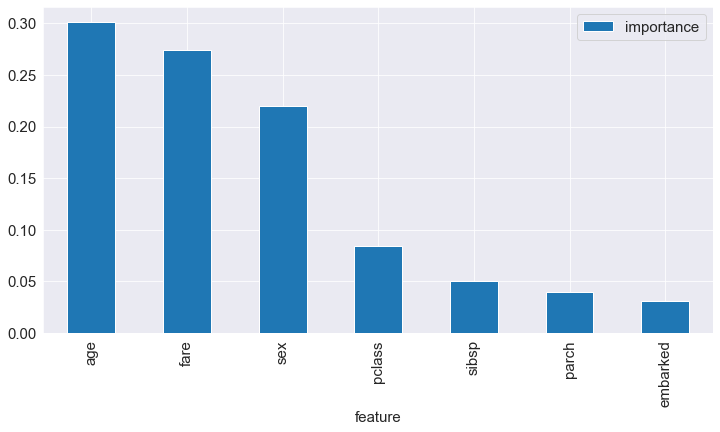

In [229]:
importances.plot.bar();

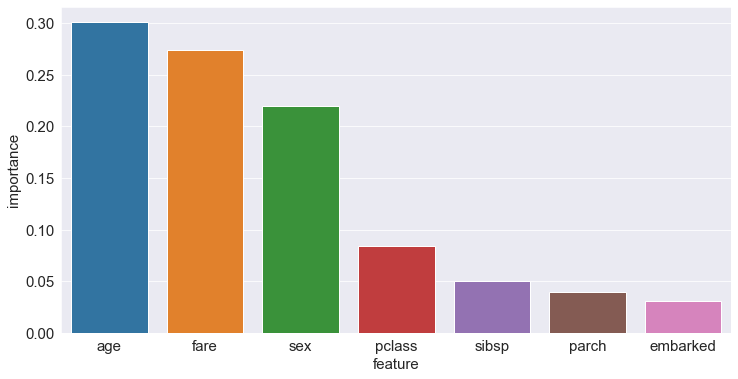

In [239]:
sns.barplot(x=importances.index,y=importances.importance);

*Logic for predicting survival using Random Forest*

In [245]:
pred=forest.predict(X_test)
print(pred)
print()   # print space
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1]


*0 -> not survived<br>1->survived*

# <font color='orange'> Predicting my Survival

In [252]:
titanic.dtypes

survived      int64
pclass        int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
sex           int32
dtype: object

Instead of X_test, we will now send our own test value. X_test contains an array of values corresponding to pclass,age,sibsp,parch,fare,embarked and sex.
We need to create an array with values filled in that order.

In [260]:
mysur=[[3,20,1,2,80,1,1]]
mysurscaled=sc.fit_transform(mysur)

In [261]:
pred=forest.predict(mysurscaled)
print(pred)
if pred==0:
    print('You did not survive.')
else:
    print('You survived!')

[0]
You did not survive.
